In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read a comma-separated values (csv) file into DataFrame.

The data folder contains a file named "newark_tree_data.csv". Read this file into a dataframe.


resources:
* [Pandas read csv docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [105]:
# Create DataFrame here.
newarktree_df = pd.read_csv('data/newark_tree_data.csv')

In [106]:
# Display the first few rows of the DataFrame here.
newarktree_df.head(3)

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
0,11.0,Elan Park,Elan Park,2,Blue Hen Rg,11.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,40,0-5%,0-5%
1,12.0,Elan Park,Elan Park,2,Blue Hen Rg,12.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,41,0-5%,0-5%
2,13.0,Elan Park,Elan Park,2,Blue Hen Rg,13.0,Front,False,"pine, eastern white",Pinus strobus,...,False,False,False,False,True,False,No,54,0-5%,6-10%


In [187]:
# How many columns does the DataFrame contain?
# len(newarktree_df.index)
newarktree_df.shape[0]

4193

In [108]:
# What attributes (columns) does this DataFrame contain?
newarktree_df.describe()
newarktree_df.columns


Index(['ID', 'ON', 'AREA', 'ADDRESS', 'STREET', 'SITE', 'SIDE', 'ASSIGNED',
       'COMMON', 'BOTANICAL', 'CULTIVAR', 'DBH', 'REMOVAL', 'STEMS', 'COND',
       'MAINTPRIM', 'OBSERVE', 'INSPECT', 'LOCATION', 'NOTES', 'DATE', 'TIME',
       'STAFF', 'XCOORD', 'YCOORD', 'FAILURE', 'LIKELIHOOD', 'TARGET',
       'CONSEQ', 'RISK', 'UNIQUEID', 'EDITTIME', 'SPREAD', 'HEIGHT',
       'CLEARANCE', 'DECAYCL', 'DECAYT', 'DECAYRF', 'DAMC', 'DAMT', 'DAMRF',
       'CAVITYCL', 'CAVITYT', 'CAVITYRF', 'IMPROPMULC', 'IMPROPPRUN',
       'NUTRIENTD', 'PEST', 'GIRDLING', 'STRESS', 'OHUTILITY', 'TOP_HEIGHT',
       'CROWN_M', 'CROWN_DIE'],
      dtype='object')

Upon reviewing the columns of the DataFrame, we see that there is already a column named ID that is well suited for an index column.  

For the purposes of this lab, we are only going to need a few of the available attributes. The attributes we wish to keep are listed below:
* ID
* UNIQUEID
* COMMON
* BOTANICAL
* COND
* RISK
* HEIGHT

Let's provide the index_col and the usecols args when we invoke the read_csv method.

In [109]:
# Create the new DataFrame with the specified columns
filtered_df = newarktree_df[['ID', 'UNIQUEID', 'COMMON', 'BOTANICAL', 'COND', 'RISK', 'HEIGHT']]


In [110]:
# Display the first few rows of the new DataFrame here.
filtered_df.head(3)

,ID,UNIQUEID,COMMON,BOTANICAL,COND,RISK,HEIGHT
0,11.0,LM 20150929141218,"arborvitae, eastern",Thuja occidentalis,Good,Low,40
1,12.0,LM 20150929141418,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,40
2,13.0,LM 20150929141844,"pine, eastern white",Pinus strobus,Good,Low,54


The data narritive specifies that 4,193 sites were inventoried. Use the DataFrame shape attribute to verify the number of rows.

In [111]:
# How many rows does your DataFrame contain.
filtered_df.shape

(4193, 7)

Let's look at the distribution of data for the HEIGHT attribute.

In [112]:
# What is the min height?
int(filtered_df['HEIGHT'].max())

140

In [113]:
# What is the max height?
140

140

In [114]:
# How do we acquire count, mean, standard deviation, and distribution information from the DataFrame 
# by invoking a single method?
filtered_df.describe()

,ID,HEIGHT
count,4193.000000,4193.000000
mean,2097.000000,55.311472
std,1210.559168,36.293489
min,1.000000,0.000000
25%,1049.000000,23.000000
50%,2097.000000,50.000000
75%,3145.000000,86.000000
max,4193.000000,140.000000


# Plot a histogram using the HEIGHT attribute. 

resources:
* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
* [Pandas Series Hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist)

In [115]:
# Apply magic command to display matplotlib images inline
%matplotlib inline


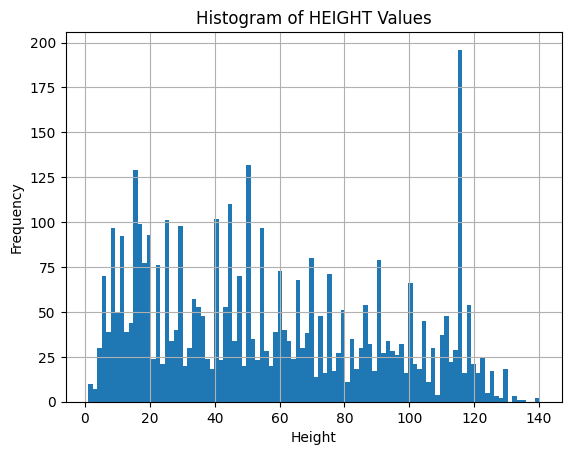

In [149]:
# Create a histogram using the HEIGHT attribute here
# Plot the histogram of the 'HEIGHT' column

filtered_df['HEIGHT'].hist(bins=100)  # Adjust the number of bins as needed
plt.title('Histogram of HEIGHT Values')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

The data narrative specifies the following:
"A total of 4,193 sites were inventoried, including 4,087 trees, 100 stumps, and 6 vacant planting sites"

Earlier, we were able to validate the total number of entries in the DataFrame. Let's now dig in a bit deeper and validate the stumps and vacant planting sites.

In [117]:
# How many entries are stumps
int((filtered_df['COMMON'] == 'stump').sum())
print("Stumps")
int((filtered_df['BOTANICAL'] == 'stump').sum())

Stumps


100

In [118]:
# How many entries are vacant sites
print("Vacant Sites")
int(filtered_df['COMMON'].str.contains('vacant').sum())


Vacant Sites


6

In [119]:
# Do these number add up?


# Plot a bar graph using the COND attribute.

resources:
* [Pandas Series Bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html#pandas.Series.plot.bar)

In [120]:
# How can we determine all of the possible values describing the condition of a tree and their associated counts?
condition_values = filtered_df['COND'].unique()
for value in condition_values:
    print(value)

Good
Very Good
Fair
Poor
Dead
Critical
nan
Very Poor
Excellent


In [146]:
# Were these already in the order you would want them to be in order for a graph to make sense? 
# If not, reorder  the Series.
# Filter the DataFrame based on a condition and create a copy
filtered_df = newarktree_df[newarktree_df['COND'].notna()].copy()  # Ensure to create a copy

# Replace 'N/A' values with 'Unknown'
filtered_df['COND'] = filtered_df['COND'].replace('N/A', 'Unknown')

# Define your preferred order
preferred_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'Very Poor', 'Critical', 'Dead', 'Unknown']

# Convert the COND column to a categorical type with the specified order
filtered_df['COND'] = pd.Categorical(filtered_df['COND'], categories=preferred_order, ordered=True)

# Sort the DataFrame by the COND column
new_filter_df = filtered_df[['ID', 'UNIQUEID', 'COMMON', 'BOTANICAL', 'COND', 'RISK', 'HEIGHT']]
new_filter_df.sort_values('COND')


,ID,UNIQUEID,COMMON,BOTANICAL,COND,RISK,HEIGHT
2887,2888.0,SR 20151006104051,"hickory, pignut",Carya glabra,Excellent,Low,7
3069,3070.0,SR 20151008143659,"arborvitae, eastern",Thuja occidentalis,Excellent,Low,17
3070,3071.0,SR 20151008144013,"crapemyrtle, common",Lagerstroemia indica,Excellent,Low,15
3383,3384.0,SR 20151015151955,"redcedar, eastern",Juniperus virginiana,Excellent,Low,6
3382,3383.0,SR 20151015151753,"redcedar, eastern",Juniperus virginiana,Excellent,Low,15
...,...,...,...,...,...,...,...
2476,2477.0,RdG 20151022144712,"sweetgum, American",Liquidambar styraciflua,Dead,Low,71
2477,2478.0,RdG 20151022144844,"ash, white",Fraxinus americana,Dead,High,67
3517,3518.0,SR 20151019153819,unknown tree,unknown tree,Dead,Moderate,70
1019,1020.0,LM 20151014144832,"oak, spp.",Quercus spp.,Dead,Moderate,50


In [147]:
# How many entries have missing values for the COND attribute? Why are these values missing?
na_count = (newarktree_df['COND'].str.strip() == 'N/A').sum()

# Count entries that are None (NaN)
missing_count = newarktree_df['COND'].isna().sum()

# Total missing values (including NaN and 'N/A')
total_missing = int(missing_count + na_count)
print("Missing condition values")
total_missing

Missing condition values


106

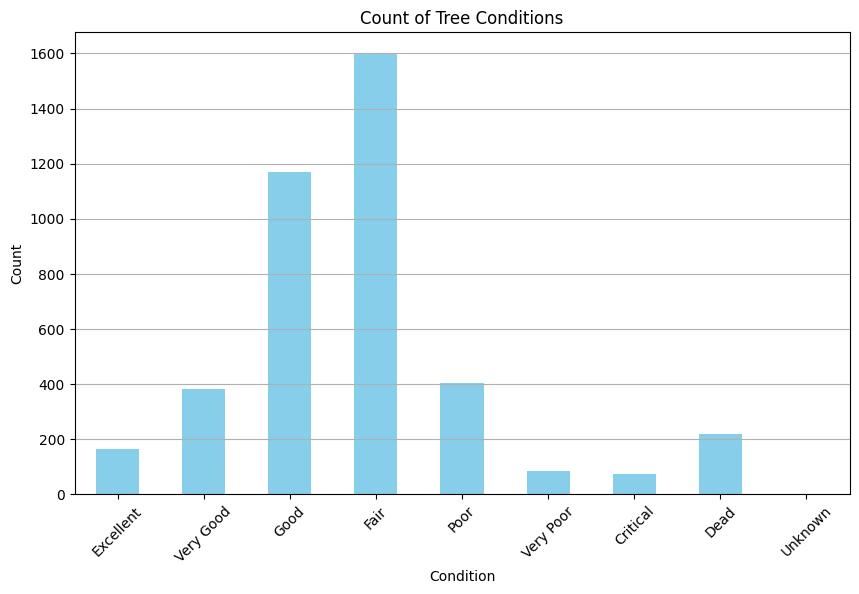

In [122]:
# Plot the Series here
# Plotting
plt.figure(figsize=(10, 6))
new_filter_df['COND'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Count of Tree Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot a pie chart using the RISK attribute.

resources:
* [Pandas Series Pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html#pandas.Series.plot.pie)
* [matplotlib pie chart docs](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

In [173]:
# How can we determine all of the possible values describing the RISK associated with each tree
# along with the corresponding row counts?
risk_values = new_filter_df['RISK'].unique()
for value in risk_values:
    print(value, (new_filter_df['RISK'] == value).sum())
risk_counts = new_filter_df['RISK'].value_counts()


Low 3833
Moderate 241
High 13


In [162]:
# Create an array containing the colors green, yellow, and orange
# When we create our pie chart, the colors should be associated with the attributes according to the specifications below:
# Green -> Low
# Yellow -> Moderate
# Orange -> High
colors = ['green', 'yellow', 'orange']



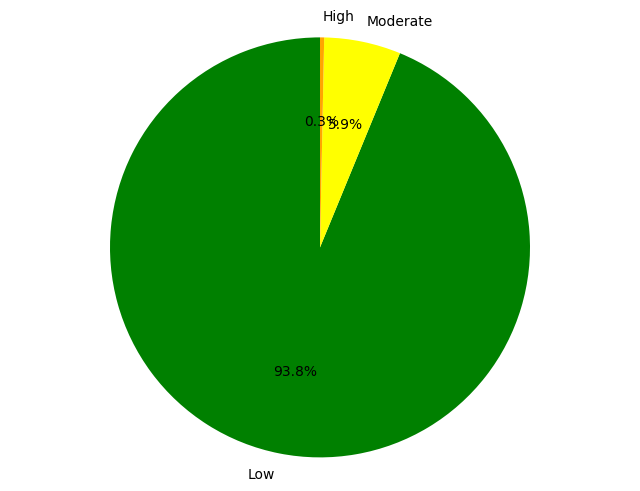

In [163]:
# Plot the pie chart here
plt.figure(figsize=(8,6))
plt.pie(risk_counts, labels = risk_counts.index, colors = colors[:len(risk_counts)], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.show()

In [177]:
# How many entries have missing values for the RISK attribute? Why are these values missing?
missing_risk_count = int(newarktree_df['RISK'].isna().sum())
print("Missing risk count:")
missing_risk_count

Missing risk count


106

# Indexing

In [180]:
# Display row by position 1
pos1 = new_filter_df.iloc[1]
pos1

ID                          12.0
UNIQUEID       LM 20150929141418
COMMON       arborvitae, eastern
BOTANICAL     Thuja occidentalis
COND                   Very Good
RISK                         Low
HEIGHT                        40
Name: 1, dtype: object

In [190]:
# Display row by label 1
pos1 = new_filter_df.loc[1]
pos1
pos_tree = new_filter_df.loc[new_filter_df['BOTANICAL'] == 'Thuja occidentalis']
pos_tree

,ID,UNIQUEID,COMMON,BOTANICAL,COND,RISK,HEIGHT
0,11.0,LM 20150929141218,"arborvitae, eastern",Thuja occidentalis,Good,Low,40
1,12.0,LM 20150929141418,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,40
8,19.0,LM 20150929144438,"arborvitae, eastern",Thuja occidentalis,Fair,Low,55
9,20.0,LM 20150929144602,"arborvitae, eastern",Thuja occidentalis,Fair,Low,55
10,21.0,LM 20150929144817,"arborvitae, eastern",Thuja occidentalis,Good,Low,55
...,...,...,...,...,...,...,...
3980,3981.0,SR 20151102155546,"arborvitae, eastern",Thuja occidentalis,Good,Low,25
3981,3982.0,SR 20151102155640,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,20
3994,3995.0,SR 20151102163447,"arborvitae, eastern",Thuja occidentalis,Excellent,Low,20
3995,3996.0,SR 20151102163635,"arborvitae, eastern",Thuja occidentalis,Excellent,Low,20
